# Question 3D: Finite Difference Method

Given the second order differential equation function.

$$ \frac{d^2y}{dx^2} = f(x, y , \frac{dy}{dx} )$$
$$ xy'' - 2xy' +2y = x^3sin(x) $$

The Boundary value problem:

$$ y(\frac{\pi}{2}) = \frac{1}{20}\pi^2 - \pi, \ and \ y(2\pi) = \frac{4}{5}\pi^2 - 2\pi $$

The step size $h=\pi/20$ the actual $y(x)$ is unknown, we wish to find $y(3\pi/2)$.

$$ y'' = \frac{y_{n+1} - 2y_n + y_{n-1}}{h^2}  \quad \ (from \ central \ difference) (1) $$
$$ y' = \frac{y_{n+1} - y_n}{h} \ quad \ (From \ Forward \ Euler) \ (2) $$



So using (1) and (2) we get:

$$ x_n\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - 2x_n\frac{y_{n+1} - y_n}{h} + 2y_n = x_n^3\sin(x_n)  \quad (3)$$

We are using $h=\pi/20$, so (3) becomes,

$$ y_{n+1}(\frac{x_n}{h^2} -\frac{2x_n}{h}) + 2y_n(\frac{x_n}{h} - \frac{x_n}{h^2} + 1) + y_{n-1}(\frac{x_n}{h^2}) = x_n^3\sin(x_n) \quad (4)$$

$$y_0 = \frac{1}{20}\pi^2 - \pi$$                
$$-2.726y_2 + 3.453y_1 + 1.2732y_0 = 0$$ 
$$-4.090y_3 + 4.18.028y_2 + 1.9098y_1 = 0$$
$$y_3 = \frac{4}{5}\pi^2 - 2\pi$$


$$
\begin{equation*}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
1.2732 & 3.45352 & -2.72676 & 0 \\
0 & 1.9098 & 4.18028 & -4.09014 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 
\end{bmatrix}
= \begin{bmatrix}
-2.64811243 \\
0  \\
0 \\
1.61249821
\end{bmatrix}
\end{equation*}
$$




In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Discrete Interval 
Here we will use a step sizes on the  $ \frac{\pi}{2} \leq x \leq 2\pi $.
### Interval
The step Size will be $h_{1} = \frac{\pi}{20}$

with the discrete time steps,
$$ x_{i} = 0 + \frac{\pi}{20}i $$
for  $i=0,1,...,30$.



0.15707963267948966


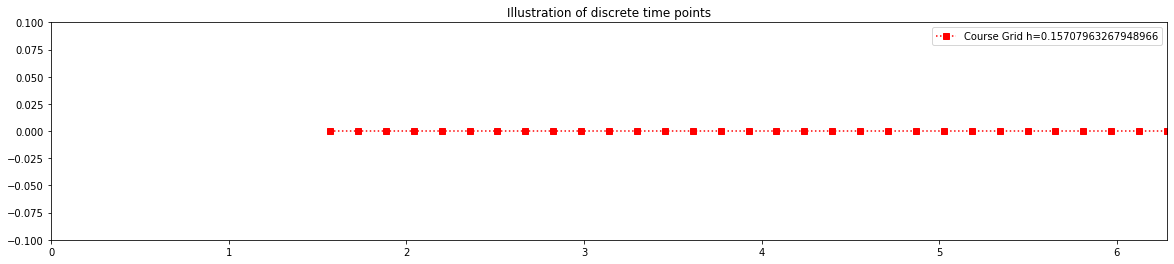

In [12]:
# Start and end of interval
b=2*math.pi
a=math.pi/2

N1=30

h1=((b-a)/N1)
print(h1)

x1=np.arange(a,b+h1,h1)


fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))


plt.xlim((0,2*math.pi))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

In [13]:
y0 = np.zeros(N1+1)
y1 = np.zeros(N1+1)
y2 = np.zeros(N1+1)

for i in range (0,N1):
    y0[i] = x1[i]/(h1**2)
    y1[i] = 2*(x1[i]/(h1) -x1[i]/(h1**2) +1)
    y2[i] = (x1[i]/(h1**2) -2*x1[i]/(h1))


In [14]:
def myfun_b(x,h):
    #print(x)
    #print(x**3)
    #print(math.sin(x))
    #print(x**3*math.sin(x))
    return (x**3*math.sin(x))

def myfun_A(size, b0, bn, y0, y1, y2 ):
    A = np.zeros(shape=(size+1,size+1))
    A[0][0] = b0
    A[size][size] = bn
    for i in range(1,size):
        A[i][i-1] = y0[i]
        A[i][i] = y1[i]
        A[i][i+1] = y2[i]
    return A



Text(0.5, 1.0, 'Analytical and Finite Difference Method Solutions')

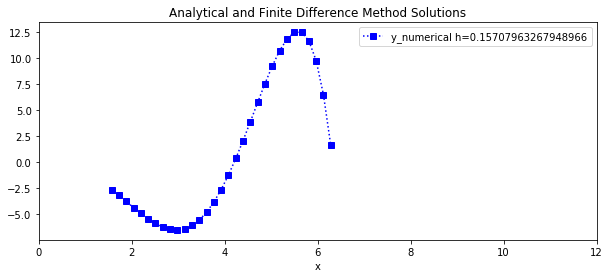

In [15]:

A = myfun_A(N1, 1, 1, y0, y1, y2 )
#print(A)
b = np.zeros(N1+1)

b[0] = 1/20*math.pi**2 - math.pi
b[N1] = 4/5*math.pi**2 - 2*math.pi
for i in range (1,N1-1):
    b[i] = myfun_b(x1[i], h1)
    #if abs(b[i]) < 0.000000000001:
    #b[i] =0
#print(x1)
#print(b)
#print(math.sin(4.71238))
y_numerical = np.linalg.solve(A, b)

#y_actual = myfun_yactual(x1)

fig = plt.figure(figsize=(10,4))

plt.plot(x1,y_numerical,'s:',color='blue',label='y_numerical h=%s'%(h1))
#plt.plot(x1,y_actual,'^:',color='red',label='y_actual h=%s'%(h1))
plt.xlim((0,12))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytical and Finite Difference Method Solutions')

In [16]:
table = ListTable()
table.append(['x', 'y_numerical'
              ])
tableSize = N1
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(y_numerical[i],5)])
    
table

x,y_numerical
1.5708,-2.64811
1.72788,-3.21168
1.88496,-3.79356
2.04204,-4.3756
2.19911,-4.93642
2.35619,-5.45185
2.51327,-5.89567
2.67035,-6.24043
2.82743,-6.4585
2.98451,-6.52322
